<h1><center><span style="color:orange"><span style="color:orange">Tesla's Hypercar R Concept Success Prediction</span></span></center></h1>


<h1><center><img src="Tesla1.jpg"><img src="Tesla3.jpg"></center></h1>

***


Used libraries: pandas, numpy, matplotlib and seaborn


In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

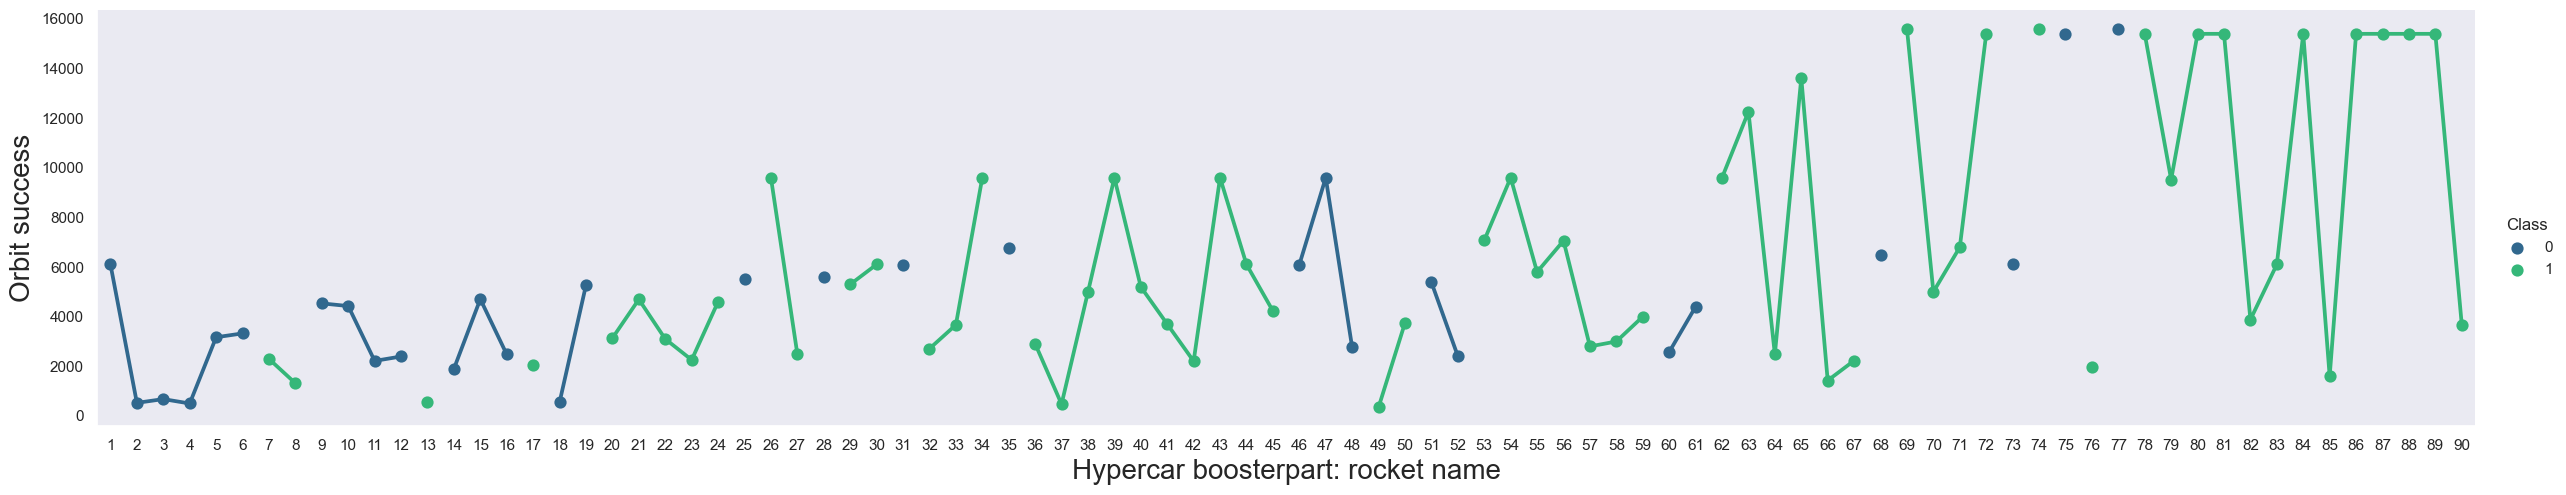

In [11]:
# Catplot (swarm) with Seaborn: as the flight number increases, the success rate increases.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5, kind="point", palette="viridis")
plt.xlabel("Hypercar boosterpart: rocket name",fontsize=20)
plt.ylabel("Orbit success",fontsize=20)
plt.show()

Choosing the correct booster for Hypercar

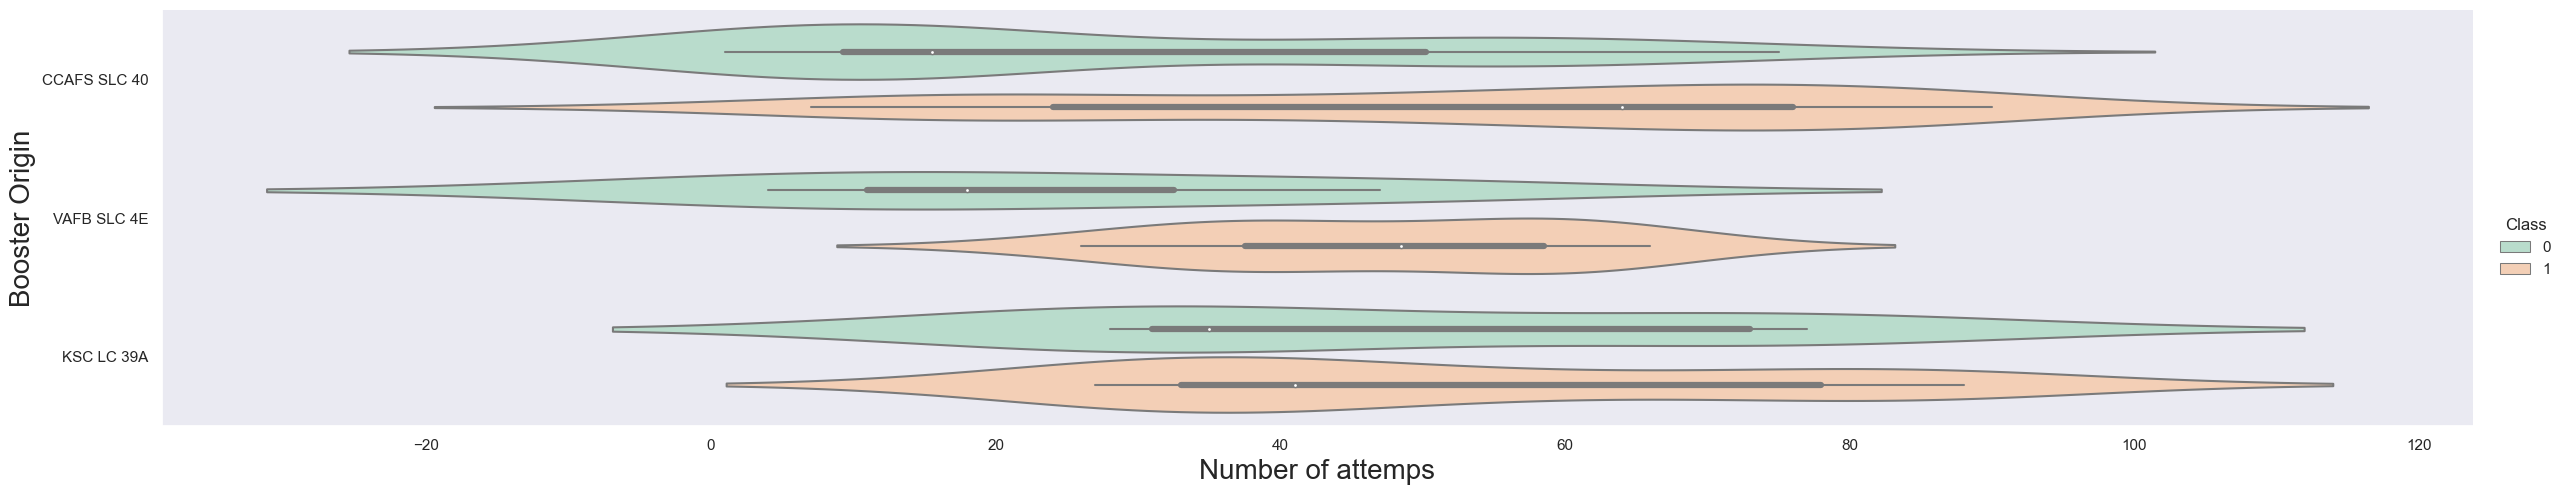

In [13]:
# Using this violin-plot with Seaborn, you can see that the qualitity of functioning increases if the Hypercar uses a booster from a trusted site.
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5, kind= "violin", palette="Pastel2")
sns.set(style="dark")
plt.xlabel("Number of attemps",fontsize=20)
plt.ylabel("Booster Origin",fontsize=20)
plt.show()

Because of Tesla checking previous tests, boosters for Hypercar can only come from some of the sites where the test can progress, as some of the boosters cannot be checked at any of the sites.

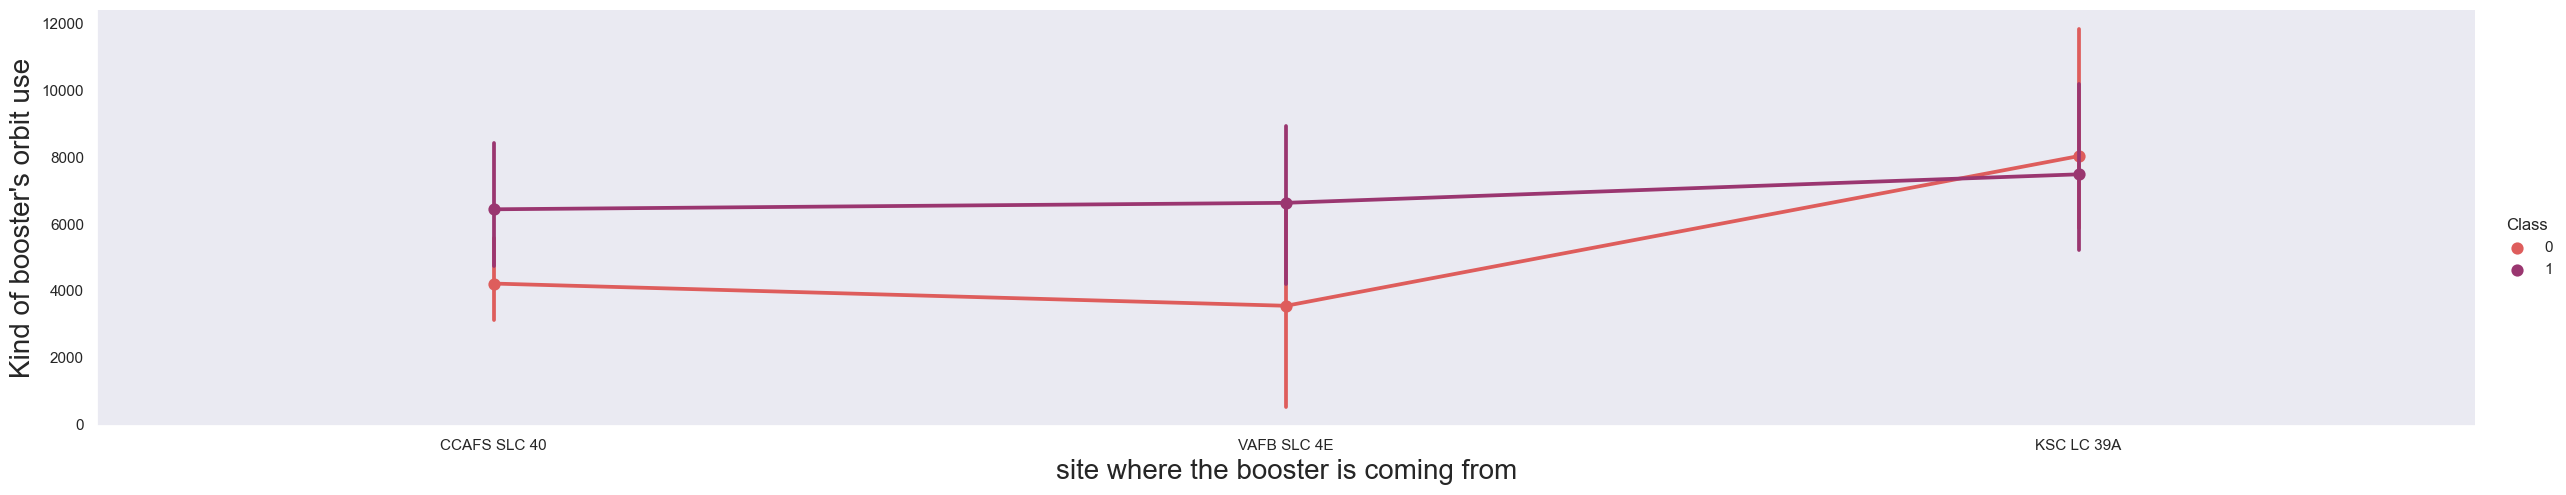

In [14]:
sns.catplot(y="PayloadMass",x="LaunchSite",hue ="Class",data=df,aspect= 5, kind="point", palette="flare")
sns.set(style="dark")

plt.xlabel("site where the booster is coming from",fontsize=20)
plt.ylabel("Kind of booster's orbit use",fontsize=20)
plt.show()

Let's create a `bar chart` for the sucess rate of each orbit


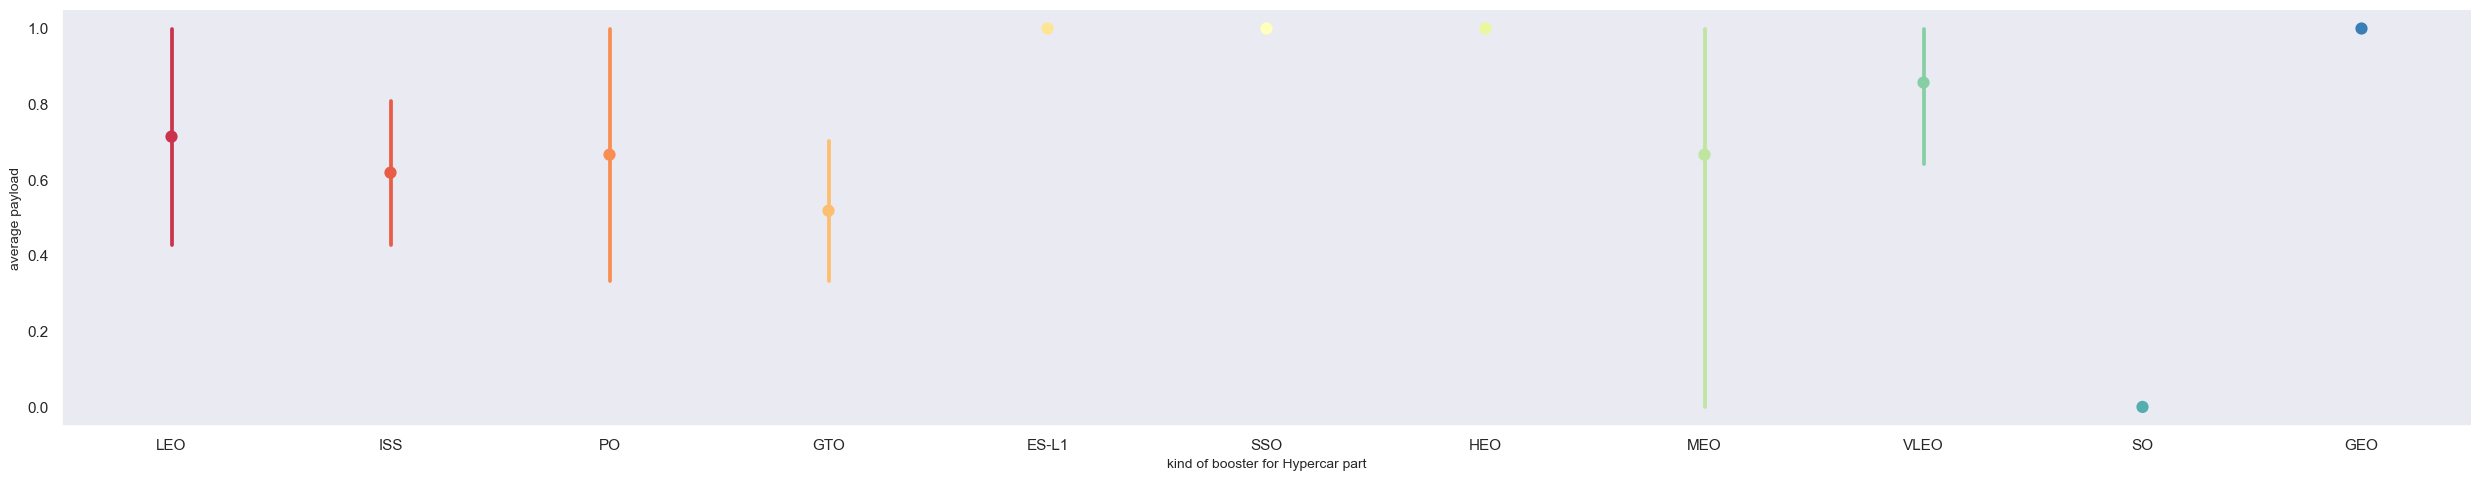

In [32]:
# Using this catplot we can predict the success rate in payloads (orbit) for the different possible boosters applied in Hypercar manufacture
df.groupby(['Orbit']).mean() 
sns.catplot(x="Orbit",y="Class", kind="point",data=df, palette="Spectral", aspect=5)
plt.xlabel("kind of booster for Hypercar part",fontsize=10)
plt.ylabel("average payload",fontsize=10)


plt.show()

This chart shows which kind of booster (payload) has the highes success rate.

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


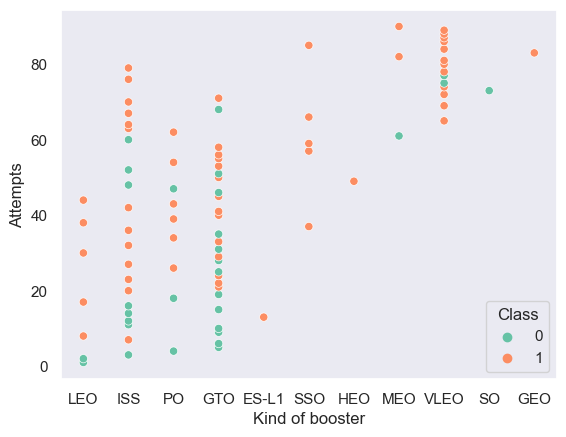

In [23]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x="Orbit",y="FlightNumber",hue="Class",data = df, palette="Set2")
plt.xlabel("Kind of booster",fontsize=12)
plt.ylabel("Attempts",fontsize=12)
plt.show()

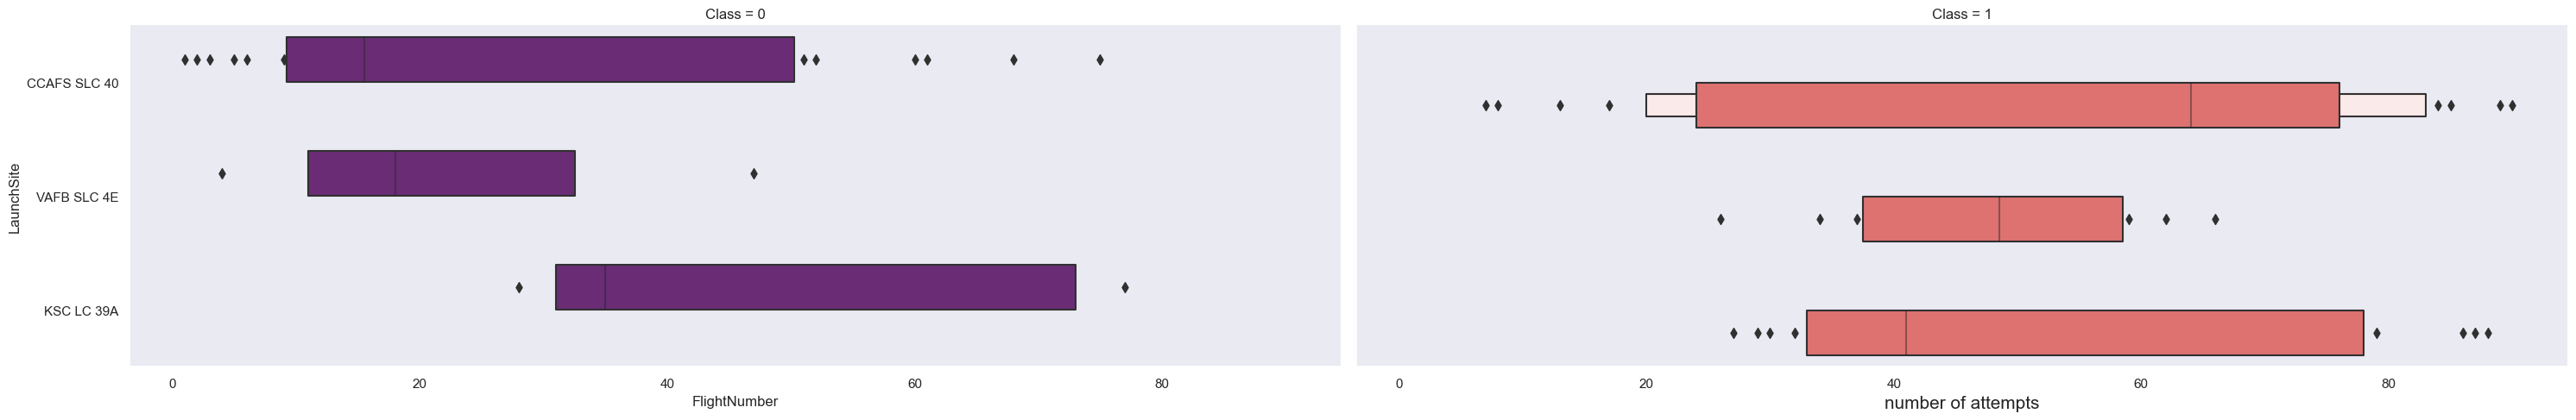

In [29]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", col="Class", data=df, kind="boxen", palette="magma", aspect = 3)

plt.ylabel("kind of booster used in Hypercar",fontsize=15)

plt.xlabel("number of attempts",fontsize=15)

plt.show()

In some of the booster's types there is a correlation between attemps and success rate, in other boosters it isn't.

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(x="Orbit",y="PayloadMass",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

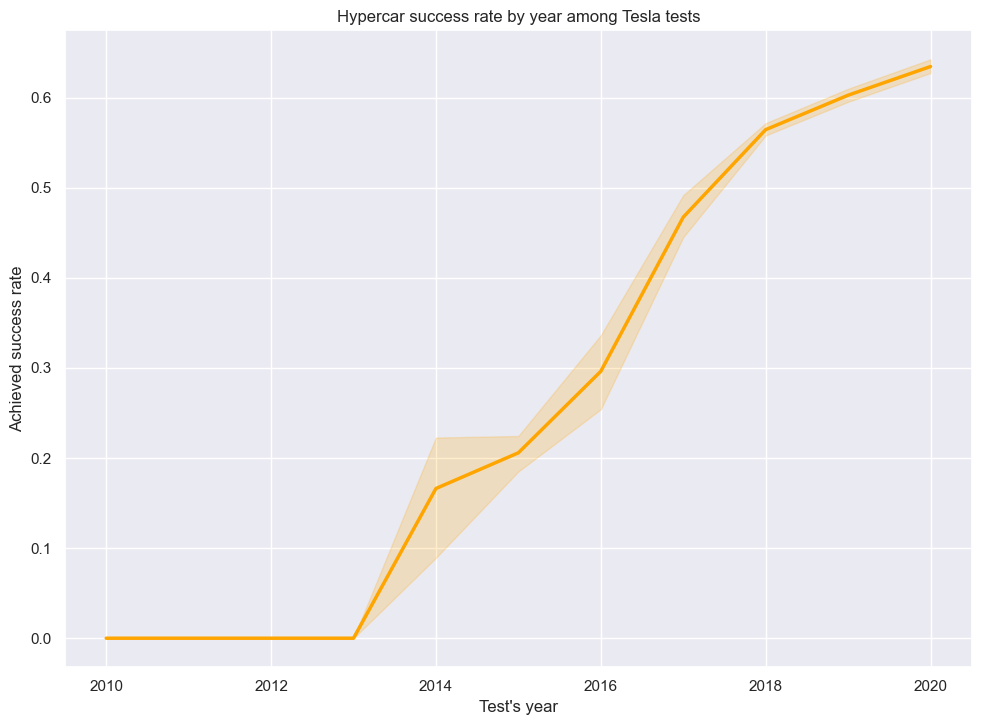

In [56]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = pd.DatetimeIndex(df['Date']).year
year = np.array(list(year))
successratelist = []
successrate = 0.00
records = 1
data = 0
for x in df['Class']:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records= records +1
    
successratelist = np.array(successratelist)
d = {'successrate':successratelist,'year':year}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate", color='orange', linewidth=2.5)

plt.xlabel("Test's year",fontsize=12)
plt.title('Hypercar success rate by year among Tesla tests')
plt.ylabel("Achieved success rate",fontsize=12)
plt.show()


For tests made between 2012 and 2020, the success rate has increased.

Defining variables


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [ ]:
# HINT: Use get_dummies() function on the categorical columns
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()
features.shape

In [ ]:
# HINT: use astype function
features_hot = df[['Orbit','LaunchSite','LandingPad','Serial']]
features_hot['Orbit'] = pd.get_dummies(df['Orbit'])
features_hot['LaunchSite'] = pd.get_dummies(df['LaunchSite'])
features_hot['LandingPad'] = pd.get_dummies(df['LandingPad'])
features_hot['Serial'] = pd.get_dummies(df['Serial'])
features_hot.head()
features_hot.shape


New csv

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [ ]:
features_hot.astype('float64')
features_hot

features_hot.to_csv('dataset_part_3.csv',index=False)